In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [10]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [11]:
input_img = Input(shape=(784,))

encoded = Dense(32, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 11ms/step - loss: 0.2774 - val_loss: 0.1929
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1737 - val_loss: 0.1559
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1450 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1274 - val_loss: 0.1197
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1164 - val_loss: 0.1108
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1092 - val_loss: 0.1051
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1043 - val_loss: 0.1011
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1009 - val_loss: 0.0982
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0985 - val_loss: 0.0963
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0969 - val_los

In [13]:
test_loss = autoencoder.evaluate(x_test, x_test)

decoded_imgs = autoencoder.predict(x_test)

threshold = 0.5
original_binarized = np.where(x_test >= threshold, 1, 0)
reconstructed_binarized = np.where(decoded_imgs >= threshold, 1, 0)

correct_predictions = np.sum(original_binarized == reconstructed_binarized)
total_pixels = x_test.size

test_accuracy = correct_predictions / total_pixels

print(f"\nTest Loss (Binary Cross-Entropy): {test_loss:.4f}")
print(f"Test Pixel Accuracy (Threshold={threshold}): {test_accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step

Test Loss (Binary Cross-Entropy): 0.0916
Test Pixel Accuracy (Threshold=0.5): 97.13%


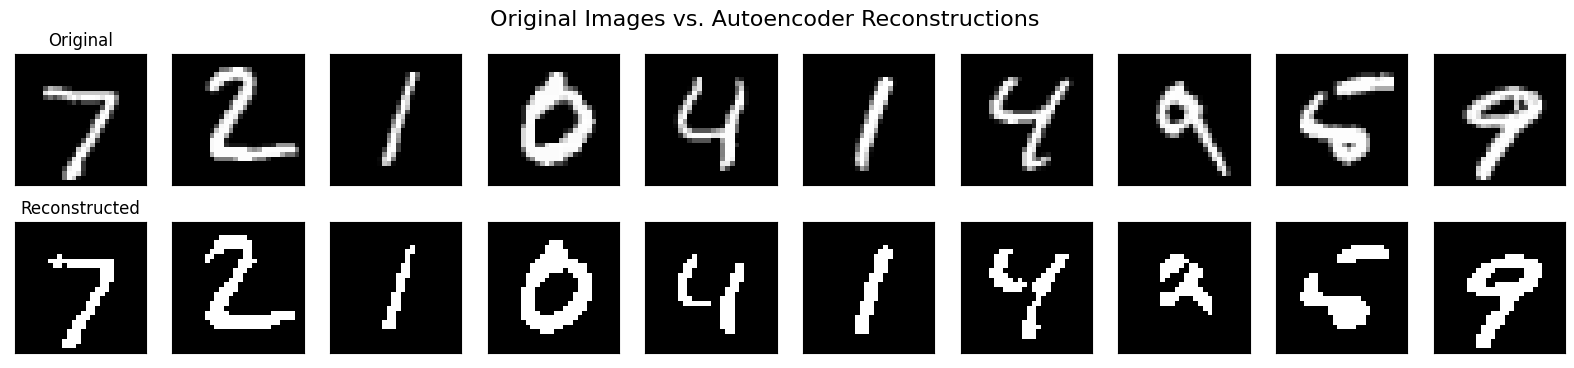

In [14]:
n = 10 
plt.figure(figsize=(20, 4))
plt.suptitle("Original Images vs. Autoencoder Reconstructions", fontsize=16)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    reconstruction = decoded_imgs[i].reshape(28, 28)
    reconstruction_binarized = np.where(reconstruction >= threshold, 1.0, 0.0)
    plt.imshow(reconstruction_binarized, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Reconstructed")

plt.show()